# E-Commerce using Sentiment Analysis

## Amazon Alexa Reviews

Amazon Alexa is a virtual assistant AI technology developed by Amazon, first introduced alongside the Amazon Echo smart speaker in November 2014. Since then, it has become a significant player in the realm of smart home technology and voice-controlled devices.

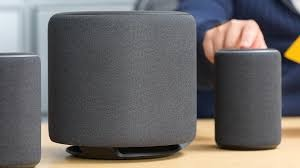

# Table of contents
1.Import packages

2.EDA

3.Preparing ML models

4.Model Data Visualization

5.Model Accuracy

6.Ensembling

7.Conclusion

## Importing packages

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer

In [2]:
# Stopwords-a set of commonly used words in a language.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [4]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [5]:
%pip install wordcloud

In [7]:
#Load the data

data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [8]:
#We will drop the null record

data.dropna(inplace=True)
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3150, 5)


In [9]:
print(f"Dataset shape : {data.shape}")
data.head()

Dataset shape : (3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
#Column names
print(f"Feature names : {data.columns.values}")
data.isnull().sum()

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [12]:
#Getting the record where 'verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback


In [13]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [14]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [15]:
data.dtypes
len(data)

3150

In [16]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


## Data Visualization

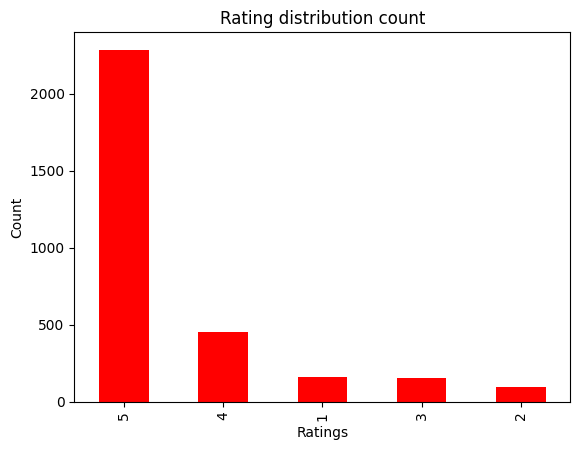

In [17]:
#Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Rating value count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


<Axes: ylabel='Percentage wise distrubution of rating'>

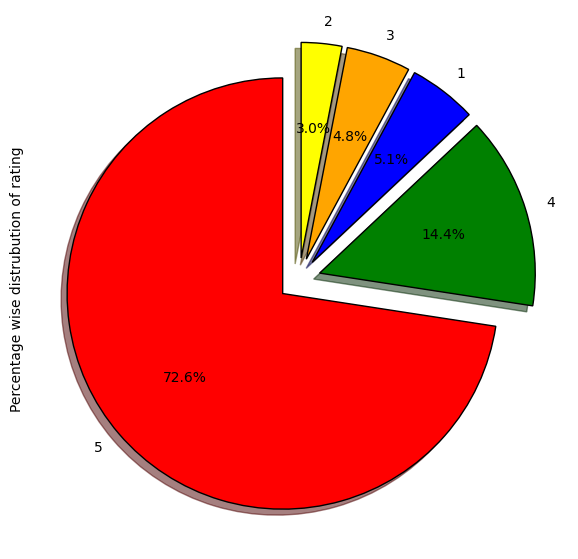

In [18]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')


In [19]:
from io import  BytesIO
graph = BytesIO()

fig.savefig(graph, format="png")
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)
#Bar graph to visualize the total counts of each feedback

Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64
Sound is terrible if u want good music too get a bose
Loved it!


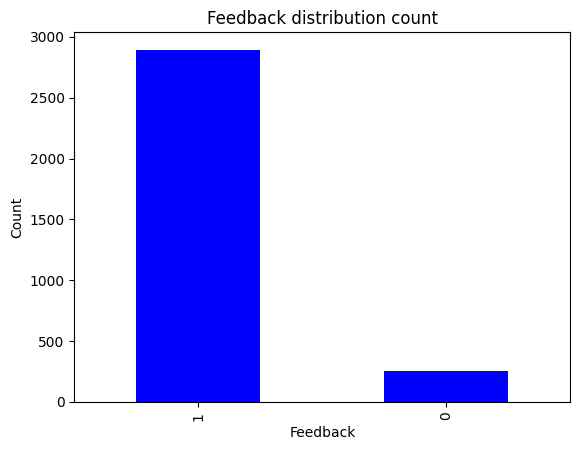

In [20]:
data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

Feedback value count - percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

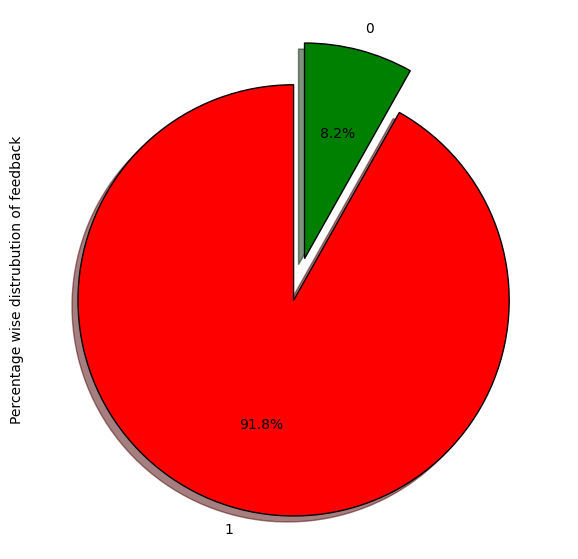

In [21]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')


In [22]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


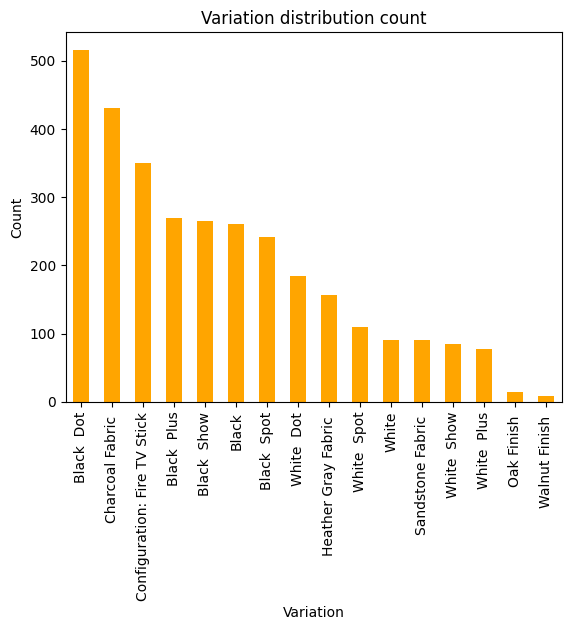

In [23]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [26]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")


Variation value count - percentage distribution: 
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


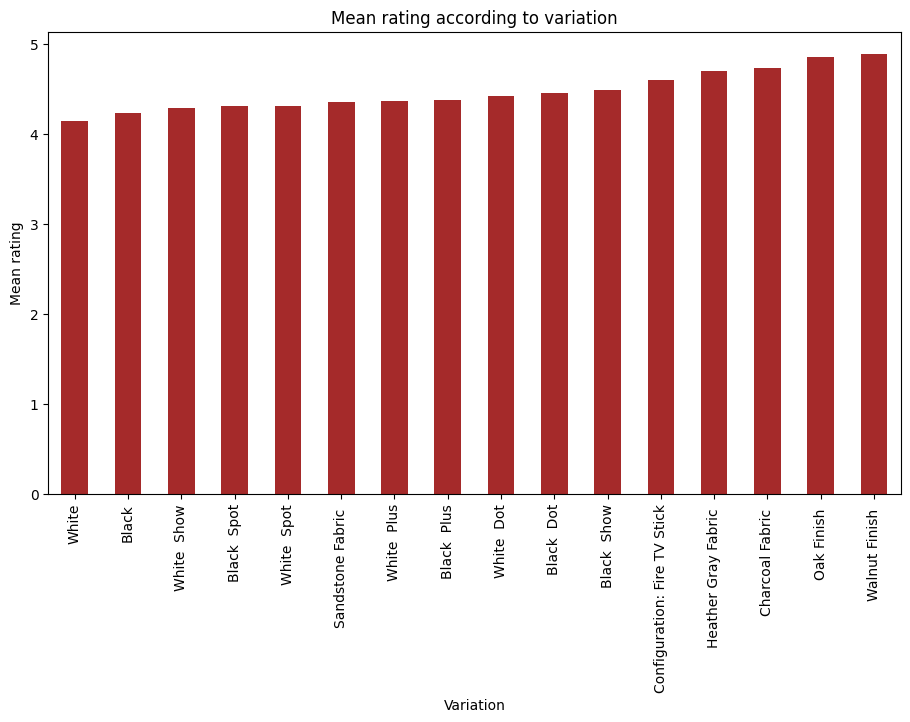

In [25]:
data.groupby('variation')['rating'].mean()
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

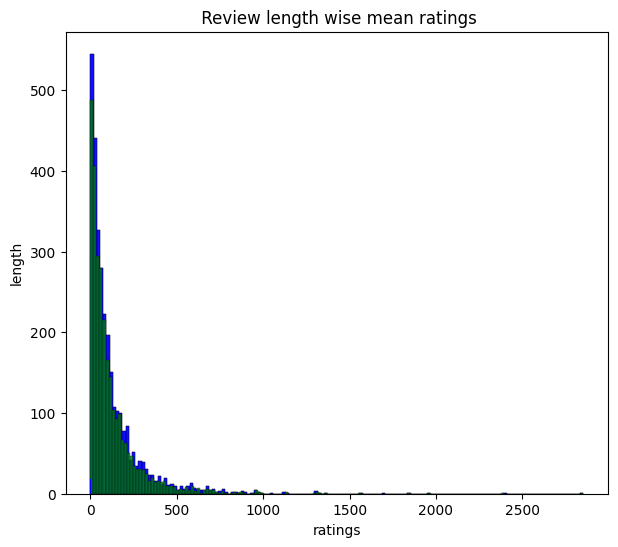

In [27]:
data['length'].describe()
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

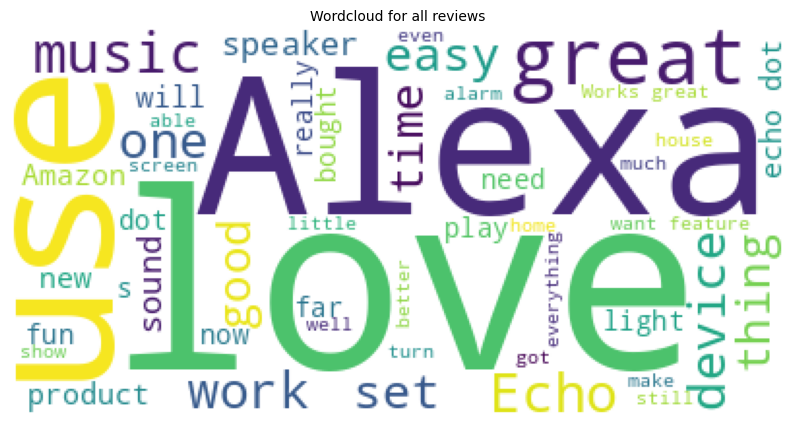

In [28]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [29]:
 #Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)
wc = WordCloud(background_color='white', max_words=50)

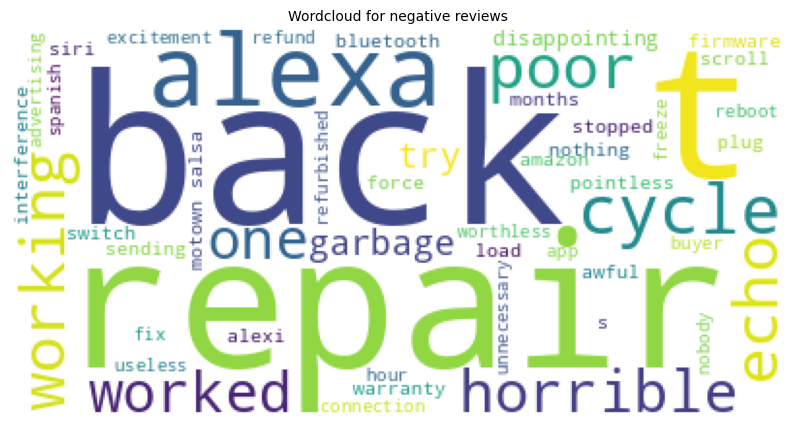

In [30]:
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()
wc = WordCloud(background_color='white', max_words=50)

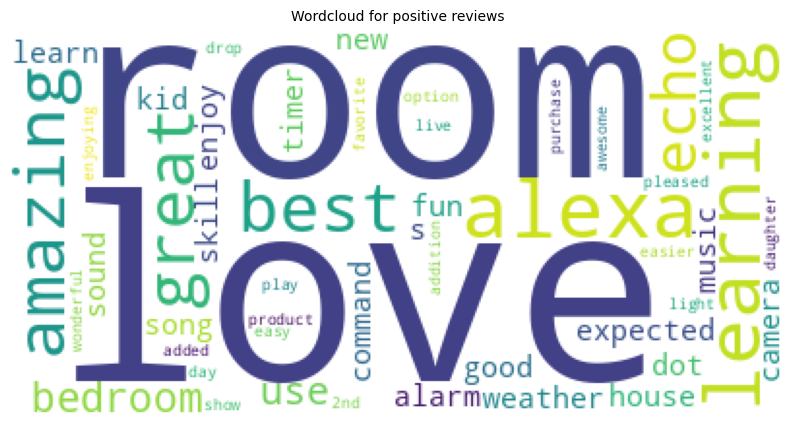

In [31]:
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)
cv = CountVectorizer(max_features = 2500)

In [32]:
#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

X shape: (3150, 2500)
y shape: (3150,)
X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)
X train max value: 12
X test max value: 10


# Random Forest

In [56]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [33]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9386243386243386


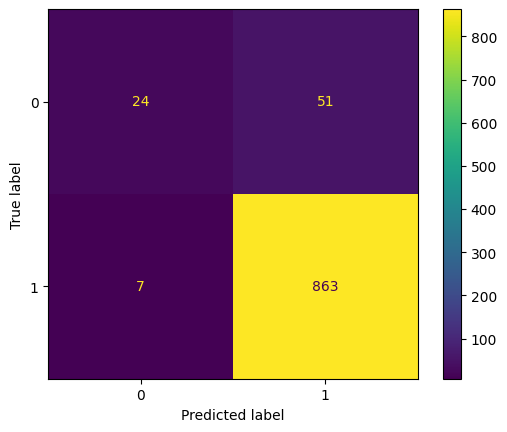

In [34]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [35]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9365220074043602
Standard Variance : 0.012411356358740975


In [36]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}
cv_object = StratifiedKFold(n_splits = 2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

#Getting the best parameters from the grid search

print("Best Parameter Combination : {}".format(grid_search.best_params_))
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}
Cross validation mean accuracy on train set : 96.9390011238118
Cross validation mean accuracy on test set : 92.29012958389346
Accuracy score for test set : 0.9386243386243386


## XGBoost

In [38]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))
y_preds = model_xgb.predict(X_test)

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408


[[ 25  50]
 [ 10 860]]


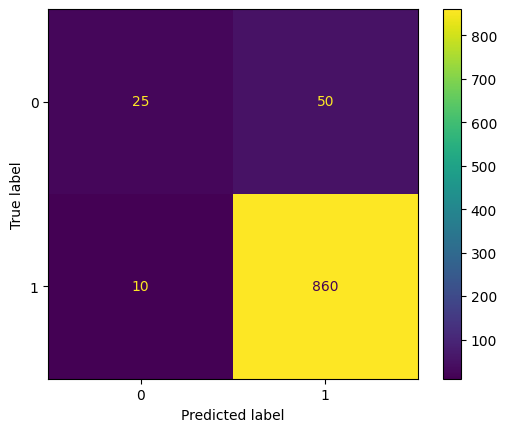

In [40]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [42]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))


#Decision Tree

In [43]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [44]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))
y_preds = model_dt.predict(X_test)

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9111111111111111


[[ 33  42]
 [ 69 801]]


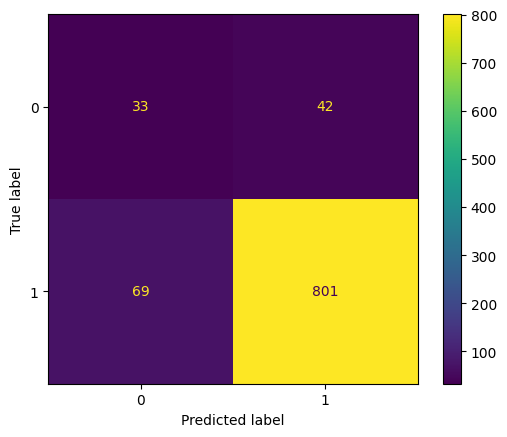

In [45]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

#Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [51]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scl, y_train)
print("Logistic Regression - Training Accuracy :", model_lr.score(X_train_scl, y_train))
print("Logistic Regression - Testing Accuracy :", model_lr.score(X_test_scl, y_test))
y_preds = model_lr.predict(X_test)

Logistic Regression - Training Accuracy : 0.964625850340136
Logistic Regression - Testing Accuracy : 0.9343915343915344


[[ 29  46]
 [ 15 855]]


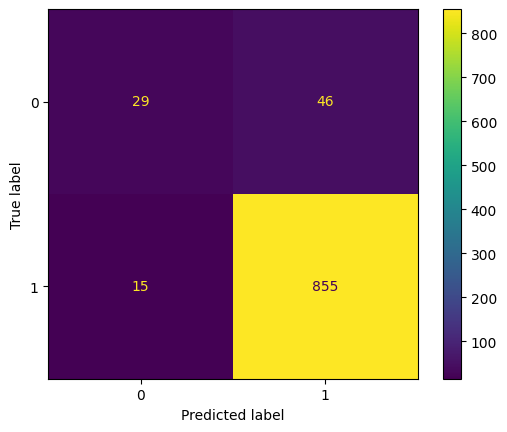

In [52]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_lr.classes_)
cm_display.plot()
plt.show()

#Support Vector Machine

In [53]:
# Support Vector Machine (SVM) Model
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_scl, y_train)

SVC(kernel='linear')

In [54]:
print("SVM - Training Accuracy :", model_svm.score(X_train_scl, y_train))
print("SVM - Testing Accuracy :", model_svm.score(X_test_scl, y_test))
y_preds = model_svm.predict(X_test)

SVM - Training Accuracy : 0.9863945578231292
SVM - Testing Accuracy : 0.9375661375661376


[[ 39  36]
 [ 43 827]]


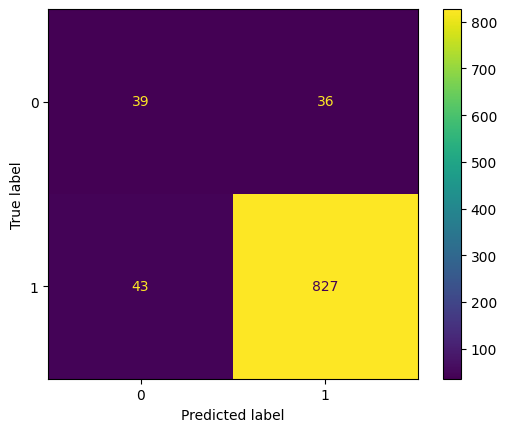

In [55]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
cm_display.plot()
plt.show()

#Comparison of Training and Testing Accuracies

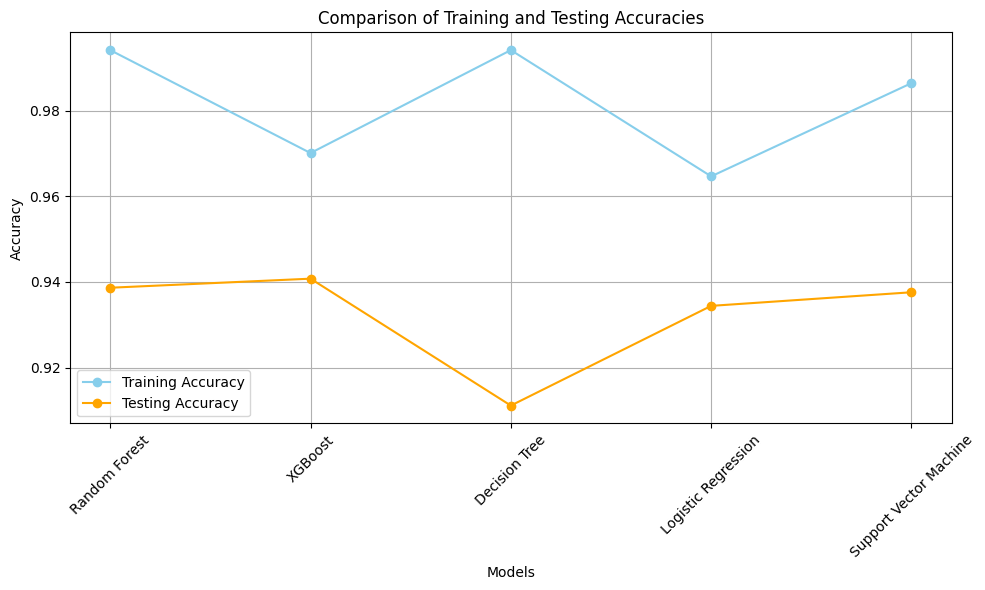

In [58]:
import matplotlib.pyplot as plt

# Define models and their names
models = [model_rf, model_xgb, model_dt, model_lr, model_svm]
model_names = ['Random Forest', 'XGBoost', 'Decision Tree', 'Logistic Regression', 'Support Vector Machine']

# Calculate training and testing accuracies for each model
train_accuracies = [model.score(X_train_scl, y_train) for model in models]
test_accuracies = [model.score(X_test_scl, y_test) for model in models]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(model_names, train_accuracies, marker='o', label='Training Accuracy', color='skyblue')

# Plot testing accuracies
plt.plot(model_names, test_accuracies, marker='o', label='Testing Accuracy', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracies')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
best_model_index = test_accuracies.index(max(test_accuracies))
best_model_name = model_names[best_model_index]

print(f"The best model is {best_model_name} with a testing accuracy of {test_accuracies[best_model_index]*100:.2f}%.")

The best model is XGBoost with a testing accuracy of 94.07%.
